Назва дисципліни: Обробка та аналіз біомедичних даних

Група: БС-83

Студент: Каліновська Б.В.

Лабораторна робота №6

Тема:Парний t-критерій Стьюдента

Завдання:

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам

In [2]:
#Імпортування бібліотек
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [3]:
#Складаємо таблицю
#Будуємо таблицю спряженості
#Студенти вирішували логічні завдання до та після курсу навчання
columns_before = [25,23,28,29,35,31,24,24,38,26,20]
columns_after = [22,25,23,22,30,27,20,19,32,25,20]
st_table = pd.DataFrame({'Курс(до)':columns_before,
                         'Курс(після)':columns_after},
                            index=np.arange(1, len(columns_before) + 1))
st_table.columns.name = '№'

st_table

№,Курс(до),Курс(після)
1,25,22
2,23,25
3,28,23
4,29,22
5,35,30
6,31,27
7,24,20
8,24,19
9,38,32
10,26,25


2. Побудувати графік, що відображає розкид даних в групах

[Text(0, 0.5, 'Вирішення логічного завдання до та після курсу'),
 Text(0.5, 0, 'секунди')]

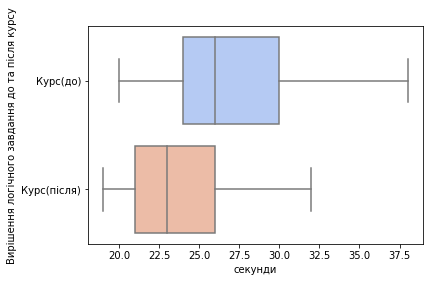

In [4]:
#Діаграма розмаху, коро́бковий графік, графік «ящик з вусами» — засіб візуалізації в описовій статистиці груп числових даних 
#через їх квантилі. Коробковий графік може також мати лінії, які виходять вертикально з коробки (вони називаються вусами), 
#вони вказують величину мінливості поза верхньою та нижньою межами квантиля. Викиди може бути нанесено у вигляді точок.

sns.boxplot( data=st_table, orient='h', palette='coolwarm').set(xlabel='секунди', 
                                                        ylabel='Вирішення логічного завдання до та після курсу')

3. Написати функцію для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant)

In [5]:
#Коефіцієнт кореції Пірсона обчислюється за формулою 
#r=n*sum_product - (sum_b * sum_a) / sqrt((n*sum_sq_b - sum_sum_b)*(n*sum_sq_a - sum_sum_a))

def Pirson_koef(col_b, col_a):
    n=len(col_b) #n - кількість
    
    sum_product = 0
    for i in range(len(col_b)):
        sum_product += col_b[i] * col_a[i] 
    
    sum_b=sum(col_b)
    sum_a=sum(col_a)
    
    sum_sum_b = sum_b**2
    sum_sum_a = sum_a**2
    
    sum_sq_b = 0
    sum_sq_a = 0
    for i in range(len(col_b)):
        sum_sq_b += col_b[i] **2
        sum_sq_a += col_a[i] **2
        
    r=((n*sum_product) - (sum_b*sum_a))/math.sqrt(((n*sum_sq_b) - sum_sum_b) * ((n*sum_sq_a) - sum_sum_a))
    print("Коефіцієнт Пірсона: r = ", r)
    
    #Розраховуємо число ступенів свободи
    df = n-2
    print("Число ступенів свободи: df = ", df)
    
    #Робота з файлом
  
    #Загружаємо необхідні бібліотеки
    import xlrd, xlwt
    #Відкриваємо xlsx файл
    rb = xlrd.open_workbook('tabl_1_Pirson_koef.xlsx')
    #Вибираємо активний лист (індексація з 0)
    sheet = rb.sheet_by_index(0)
    #Отримуємо значення необхідної нам ячейки (номер рядка - тобто ступінь свободи)[номер стовпчика]
    r_tabl = sheet.row_values(df)[1] #1 - це стовбець в якому знаходиться потрібне значення
    print("Критичне значення: r_tabl = ",r_tabl)
    
    if(r_tabl < r):
        result = "significant" #існує статистично значима залежність між групами 
    else:
        result = "not significant" #не існує статистично значима залежність між групами
    print("Результат оцінки значимості зв'язку:", result)

In [6]:
#Перед визначенням відмінності за парним критерієм Стьюента необхідно перевірити чи є зв'язок між групами
#Для цього використовують коефіцієнт кореляції Пірсона

Pirson_koef(columns_before, columns_after)

Коефіцієнт Пірсона: r =  0.8662517384918503
Число ступенів свободи: df =  9
Критичне значення: r_tabl =  0.6021
Результат оцінки значимості зв'язку: significant


4. Написати функцію для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant)

In [7]:
#Функція для обчислення коефіцієнту Стюдента обчислюється за формулою
#t_st = (Md/qd) * sqrt(n) 

def Student_koef(st_table, col_b, col_a):
    diff = []
    n = len(col_b)
 
    for i in range(n):
        diff.append(col_b[i] - col_a[i])
    
    #Зобразимо таблицю зі значеннями різниці
    st_table["До - Після"] = diff
    st_table.append(diff)
    print(st_table)
    
    #Середнє значення різниці
    Md = sum(diff)/n 
    
    #Стандартне відхилення між значеннями 
    #std() - обчислює середньоквадратичне (стандартне) відхилення елементів масива
    qd = np.std(diff, ddof = 1) #на основі незміщеної оцінки дисперсії,коли ddof=1 (за замовчуванням ddof=0)
   
    #Значення критерія Стюдента
    t_st = (Md/qd)*math.sqrt(n)
    print('')
    print("Значення критерію Стюдента: t_st = ", t_st)
    
    #Знаходимо значення ступеня свободи критерію
    df = n - 1
    print("Число ступенів свободи: df = ", df)
    
    #Робота з файлом
  
    #Загружаємо необхідні бібліотеки
    import xlrd, xlwt
    #Відкриваємо xlsx файл
    rb = xlrd.open_workbook('tabl_2_Student_koef.xlsx')
    #Вибираємо активний лист (індексація з 0)
    sheet = rb.sheet_by_index(0)
    #Отримуємо значення необхідної нам ячейки (номер рядка - тобто ступінь свободи)[номер стовпчика]
    t_tabl = sheet.row_values(df)[1] #1 - це стовбець в якому знаходиться потрібне значення
    
    print("Критичне значення: t_tabl = ",t_tabl)
    
    if(t_tabl < t_st):
        result = "significant" #приймається H1
    else:
        result = "not significant"  #приймається H0
    print("Результат оцінки значимості зв'язку:", result)
    
    

In [8]:
Student_koef(st_table,columns_before, columns_after)

№   Курс(до)  Курс(після)  До - Після
1         25           22           3
2         23           25          -2
3         28           23           5
4         29           22           7
5         35           30           5
6         31           27           4
7         24           20           4
8         24           19           5
9         38           32           6
10        26           25           1
11        20           20           0

Значення критерію Стюдента: t_st =  4.191289774719603
Число ступенів свободи: df =  10
Критичне значення: t_tabl =  2.228
Результат оцінки значимості зв'язку: significant


5. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність

Висновок:

Аналізуючи швидкість розв'язування студетами логічного завдання до та після курсу можна зробити висновок що:
1. За коефіцієнтом кореляції Пірсона було доведено, що існує статистично значима залежность між групами. Так як коефіцієнт кореляції менший за табличний ( r_tabl < r ), величина цього зв'язку: "висока" так як r = 0.87
2. Присутня наявність статистично значущих відмінностей швидкості вирішення логічної задачі студентами до та після курсу (так як t_tabl < t_st), звітси слідує, що була прийнята альтернативна гіпотеза про відмінність середніх